In [1]:
# !pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from collections import defaultdict
import re


In [3]:
#Load training data
training_tweets = pd.read_csv('./data/train.csv')
testt_tweets = pd.read_csv('./data/test.csv')

In [4]:
#Analyze columns and headers
print(training_tweets.head())
print(training_tweets.info())

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None


In [5]:
#Null counts
training_tweets.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:
#Check, how well is the data distributed
target_vals = training_tweets.target.value_counts()
target_vals.index = ['Unrelated','Disaster']

([<matplotlib.patches.Wedge at 0x12e9b1668>,
 [Text(-0.24110481617711207, 1.0732513534192263, 'Unrelated'),
  Text(0.24110481617711216, -1.0732513534192263, 'Disaster')],
 [Text(-0.13151171791478838, 0.5854098291377597, '57.0%'),
  Text(0.13151171791478844, -0.5854098291377597, '43.0%')])

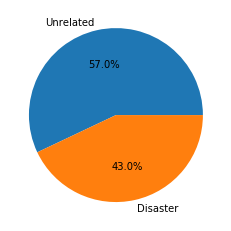

In [7]:
plt.pie(target_vals, labels=target_vals.index,  autopct='%2.1f%%')

In [8]:
#This distribution looks fair enough.

[]

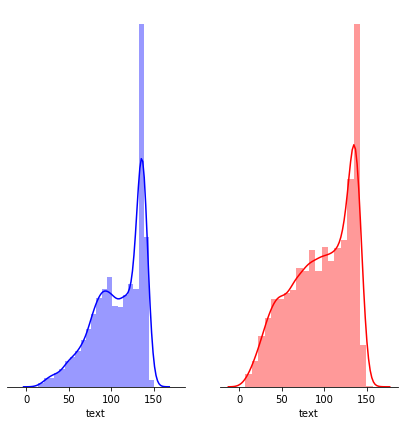

In [9]:
#Difference in number of chars in a tweet?
num_chars_disaster_tweets = training_tweets[training_tweets.target==1]['text'].str.len()
num_chars_regular_tweets = training_tweets[training_tweets.target==0]['text'].str.len()

f, axes = plt.subplots(1, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)
sns.distplot(num_chars_disaster_tweets, kde=True, color="b", ax=axes[0])
sns.distplot(num_chars_regular_tweets, kde=True, color="r", ax=axes[1])
plt.setp(axes, yticks=[])

[]

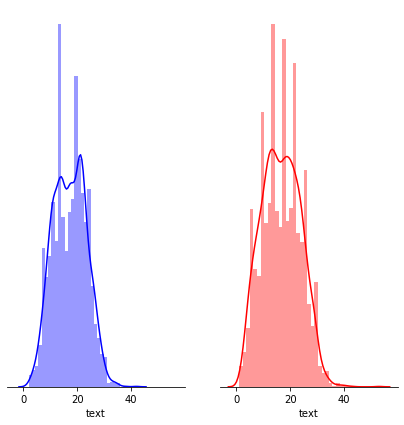

In [10]:
#These doesn't seem to differentiate the classes much.. let us see number of words
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()
num_words_disaster_tweets =  training_tweets[training_tweets.target==1]['text'].map(lambda x:len(tokenizer.tokenize(x)))
num_words_regular_tweets =  training_tweets[training_tweets.target==0]['text'].map(lambda x:len(tokenizer.tokenize(x)))

f, axes = plt.subplots(1, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)
sns.distplot(num_words_disaster_tweets, kde=True, color="b", ax=axes[0])
sns.distplot(num_words_regular_tweets, kde=True, color="r", ax=axes[1])
plt.setp(axes, yticks=[])


In [11]:
#Lets find the common stopwords in regular vs disaster tweets
def create_vocab(target):
    vocab = []
    for x in training_tweets[training_tweets.target==target]['text'].map(lambda x:tokenizer.tokenize(x)):
        for i in x:
            vocab.append(i)
    return vocab

In [12]:
disaster_vocab = create_vocab(1)
regular_vocab = create_vocab(0)

In [13]:
#Common stopwords in each
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

stop_word_dict_disaster = defaultdict(int)
for word in disaster_vocab:
    if word in stopwords:
        stop_word_dict_disaster[word] +=1
        
stop_word_dict_regular = defaultdict(int)
for word in regular_vocab:
    if word in stopwords:
        stop_word_dict_regular[word] +=1


In [14]:
top_20_disaster = sorted(stop_word_dict_disaster.items(), key=lambda x:x[1],reverse=True)[:20] 
top_20_regular = sorted(stop_word_dict_regular.items(), key=lambda x:x[1],reverse=True)[:20] 

<BarContainer object of 20 artists>

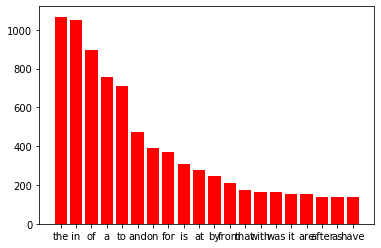

In [15]:
xval, yval=zip(*top_20_disaster)
plt.bar(xval, yval, color='r')

<BarContainer object of 20 artists>

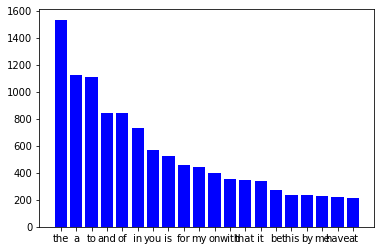

In [16]:
xval, yval = zip(*top_20_regular)
plt.bar(xval, yval, color='b')

In [17]:
import string

In [18]:
#Finding punctuations in both
import string
puncts = string.punctuation
punctuation_dict_disaster = defaultdict(int)
for word in disaster_vocab:
    if word in puncts:
        punctuation_dict_disaster[word] +=1
        
punctuation_dict_regular = defaultdict(int)
for word in regular_vocab:
    if word in puncts:
        punctuation_dict_regular[word] +=1
top_10_disaster_punctuations = sorted(punctuation_dict_disaster.items(), key=lambda x:x[1], reverse=True)[:10]
top_10_regular_punctuations = sorted(punctuation_dict_regular.items(), key=lambda x:x[1], reverse=True)[:10]

<BarContainer object of 10 artists>

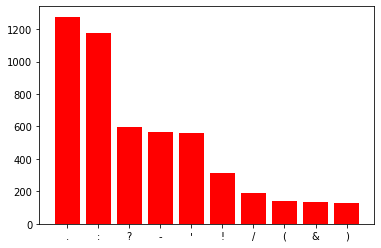

In [19]:
xval, yval = zip(*top_10_disaster_punctuations)
plt.bar(xval, yval, color='r')

<BarContainer object of 10 artists>

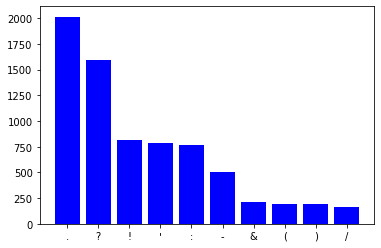

In [20]:
xval, yval = zip(*top_10_regular_punctuations)
plt.bar(xval, yval, color='b')

In [21]:
#Regular tweets use a lot more punctuations than the disaster ones... Also, interesting ! is used more 
# frequently in regular tweets.

In [22]:
# most_common words and bigram analysis
from collections import  Counter

disaster_word_counter = Counter(disaster_vocab)
regular_word_counter = Counter(regular_vocab)

In [23]:
disaster_most_common_words = defaultdict(int)
for word,count in disaster_word_counter.most_common(50):
    if word not in stopwords and word not in puncts:
        disaster_most_common_words[word] = count
        
regular_most_common_words = defaultdict(int)
for word,count in regular_word_counter.most_common(50):
    if word not in stopwords and word not in puncts:
        regular_most_common_words[word] = count
        
        
top_10_disaster_words = sorted(disaster_most_common_words.items(), key=lambda x:x[1], reverse=True)[:10]
top_10_regular_words = sorted(regular_most_common_words.items(), key=lambda x:x[1], reverse=True)[:10]

<BarContainer object of 10 artists>

/Users/aarora7/anaconda3/envs/conda36/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/aarora7/anaconda3/envs/conda36/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:176: RuntimeWarning: Glyph 137 missing from current font.
  font.load_char(ord(s), flags=flags)


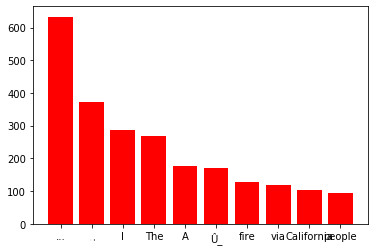

In [24]:
words,counts = zip(*top_10_disaster_words)
plt.bar(words, counts, color='r')

<BarContainer object of 8 artists>

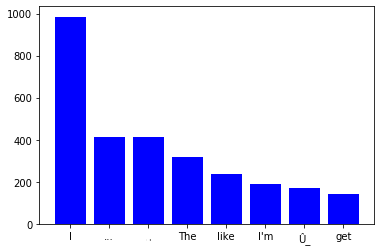

In [25]:
words,counts = zip(*top_10_regular_words)
plt.bar(words, counts, color='b')

In [26]:
puncts

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
top_10_regular_words

[('I', 985),
 ('...', 414),
 ('\x89', 412),
 ('The', 317),
 ('like', 235),
 ("I'm", 192),
 ('Û_', 171),
 ('get', 143)]

In [28]:
top_10_disaster_words

[('...', 633),
 ('\x89', 372),
 ('I', 287),
 ('The', 269),
 ('A', 178),
 ('Û_', 171),
 ('fire', 127),
 ('via', 119),
 ('California', 104),
 ('people', 93)]

In [29]:
#Removing emojis from tweets
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
def remove_emojis(text):
    return emoji_pattern.sub(r'', text)

In [30]:
training_tweets['text'] = training_tweets['text'].apply(lambda x: remove_emojis(x))

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
# Now check for most common bigrams
def get_top_tweet_bigrams(corpus, n=10):
    cv = CountVectorizer(ngram_range=(2,2))
    X = cv.fit_transform(corpus)
    freq_vector = X.sum(axis=0)
    bigram_freq = [(bigram, freq_vector[0,idx]) for bigram,idx in cv.vocabulary_.items()]
    return sorted(bigram_freq, key=lambda x:x[1], reverse=True)[:n]

In [33]:
top_disaster_bigrams =get_top_tweet_bigrams(disaster_vocab)

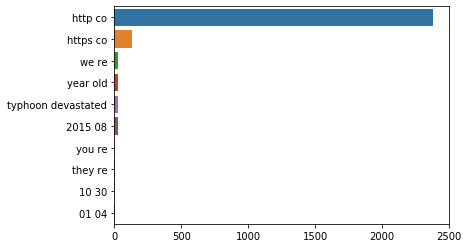

In [34]:
bigrams = [word for (word,_) in top_disaster_bigrams]
counts = [count for (_,count) in top_disaster_bigrams]
sns.barplot(x=counts, y=bigrams)

In [35]:
# removing url
def remove_url(text):
    url_regex = re.compile(r'https?://\S+|www\.\S+')
    return url_regex.sub('',text)

In [36]:
training_tweets['text'] = training_tweets['text'].apply(lambda x: remove_url(x))

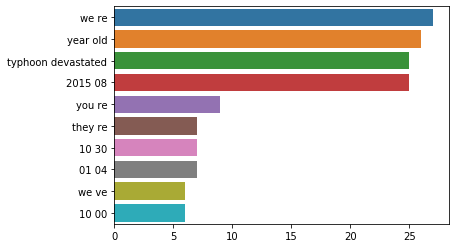

In [37]:
disaster_vocab = create_vocab(1)
top_disaster_bigrams =get_top_tweet_bigrams(disaster_vocab)
bigrams = [word for (word,_) in top_disaster_bigrams]
counts = [count for (_,count) in top_disaster_bigrams]
sns.barplot(x=counts, y=bigrams)

In [38]:
def remove_html_tags(text):
    html_tag=re.compile(r'<.*?>')
    return html.sub(r'',text)

In [39]:
training_tweets['text'] = training_tweets['text'].apply(lambda x: remove_url(x))

In [40]:
# Not remove apostrophe since it changes the meaning of some words
def remove_punctuations_except_apostrophe(text):
    punct_regex = re.compile('[%s]' % re.escape(string.punctuation.replace('\'','')))
    return punct_regex.sub('', text)

In [41]:
training_tweets['text'] = training_tweets['text'].apply(lambda x: remove_punctuations_except_apostrophe(x))

In [42]:
# correct spellings
# !pip install pyspellchecker

In [43]:
from spellchecker import SpellChecker

In [44]:
spell_check = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell_check.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell_check.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

In [52]:
#Do not do spell check, as it takes a long long time

In [53]:
from tqdm import tqdm

In [55]:
from nltk.tokenize import word_tokenize
corpus = []
len_tweet = []
for tweet in tqdm(training_tweets['text']):
#     words=[word.lower() for word in word_tokenize(tweet) if((word.isalpha()==1) & (word not in stop))]
    tweet_words = [word.lower() for word in word_tokenize(tweet) if ((word.isalpha()==1) & (word not in stopwords))]
    len_tweet.append(len(tweet_words))
    corpus.append(tweet_words)

100%|██████████| 7613/7613 [00:00<00:00, 8214.29it/s]


In [56]:
#Vectorizing with Glove now
embedding = {}
with open('./data/glove.6B.100d.txt') as glove_file:
    for line in tqdm(glove_file):
        word_vals = line.split()
        the_word = word_vals[0]
        vec = np.asarray(word_vals[1:], 'float32')
        embedding[the_word] = vec
    

400000it [00:09, 42104.74it/s]


In [57]:
max_tweet_length = np.max(len_tweet)

In [58]:
max_tweet_length

28

In [59]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.
/Users/aarora7/anaconda3/envs/conda36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/aarora7/anaconda3/envs/conda36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/aarora7/anaconda3/envs/conda36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/aaro

In [60]:
MAX_LEN = 28
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences=tokenizer_obj.texts_to_sequences(corpus)
tweet_padded=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

In [61]:
print('Number of unique words:',len(tokenizer_obj.word_index))

Number of unique words: 15993


In [62]:
total_words = len(tokenizer_obj.word_index) + 1
glove_embedded_vector = np.zeros((total_words, 100))

In [63]:
for word,idx in tqdm(tokenizer_obj.word_index.items()):
    if idx>total_words:
        continue
    vec = embedding.get(word)
    if vec is not None:
        glove_embedded_vector[idx] = vec

100%|██████████| 15993/15993 [00:00<00:00, 481917.22it/s]


## Create Model

In [88]:
from keras import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [81]:
model = Sequential()

embedding_layer = Embedding(input_dim=total_words, output_dim=100, embeddings_initializer=Constant(glove_embedded_vector), input_length=MAX_LEN, trainable=False)
model.add(embedding_layer)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))
optimzer=Adam(learning_rate=1e-5)
model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'])

In [82]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 28, 100)           1599400   
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 28, 100)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                42240     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 1,641,705
Trainable params: 42,305
Non-trainable params: 1,599,400
_________________________________________________________________


In [89]:
train=tweet_padded[:training_tweets.shape[0]]

In [90]:
X_train,X_test,y_train,y_test=train_test_split(train,training_tweets['target'].values,test_size=0.15)
print('Shape of train',X_train.shape)
print("Shape of Validation ",X_test.shape)

Shape of train (6471, 28)
Shape of Validation  (1142, 28)


In [91]:
history=model.fit(X_train,y_train,batch_size=4,epochs=15,validation_data=(X_test,y_test),verbose=2)


Train on 6471 samples, validate on 1142 samples
Epoch 1/15
 - 14s - loss: 0.6911 - accuracy: 0.5651 - val_loss: 0.6886 - val_accuracy: 0.5595
Epoch 2/15
 - 14s - loss: 0.6802 - accuracy: 0.5831 - val_loss: 0.6593 - val_accuracy: 0.6042
Epoch 3/15
 - 15s - loss: 0.6051 - accuracy: 0.7033 - val_loss: 0.5460 - val_accuracy: 0.7644
Epoch 4/15
 - 16s - loss: 0.5567 - accuracy: 0.7378 - val_loss: 0.5215 - val_accuracy: 0.7671
Epoch 5/15
 - 15s - loss: 0.5467 - accuracy: 0.7441 - val_loss: 0.5113 - val_accuracy: 0.7723
Epoch 6/15
 - 15s - loss: 0.5385 - accuracy: 0.7507 - val_loss: 0.5048 - val_accuracy: 0.7758
Epoch 7/15
 - 15s - loss: 0.5309 - accuracy: 0.7558 - val_loss: 0.4983 - val_accuracy: 0.7741
Epoch 8/15
 - 15s - loss: 0.5315 - accuracy: 0.7521 - val_loss: 0.4940 - val_accuracy: 0.7776
Epoch 9/15
 - 15s - loss: 0.5223 - accuracy: 0.7585 - val_loss: 0.4906 - val_accuracy: 0.7811
Epoch 10/15
 - 15s - loss: 0.5178 - accuracy: 0.7671 - val_loss: 0.4862 - val_accuracy: 0.7802
Epoch 11/1